Первые 5 записей в датасете:
                                               title  \
0  «Для них это проект бессмертия» Миллиардеры из...   
1  Постсоветская страна столкнулась с обрушением ...   
2        Москвичей предупредили о сильных снегопадах   
3  Сбер представил первого в России ИИ-агента для...   
4  Рост стоимости подарков для учителей признали ...   

                                                text   category  \
0  Китайские миллиардеры стали стремиться к созда...  economics   
1  В 2025 годуКиргизиястолкнулась с падением эксп...  economics   
2  В конце января вМосквеожидаются сильные снегоп...  economics   
3  В 2026 годуСбервыведет на рынок уникального ИИ...  economics   
4  Правительство не поддержало законопроект депут...  economics   

                                                 url  
0        https://lenta.ru/articles/2026/01/17/china/  
1  https://lenta.ru/news/2026/01/22/postsovetskay...  
2  https://lenta.ru/news/2026/01/22/moskvichey-pr...  
3  https://

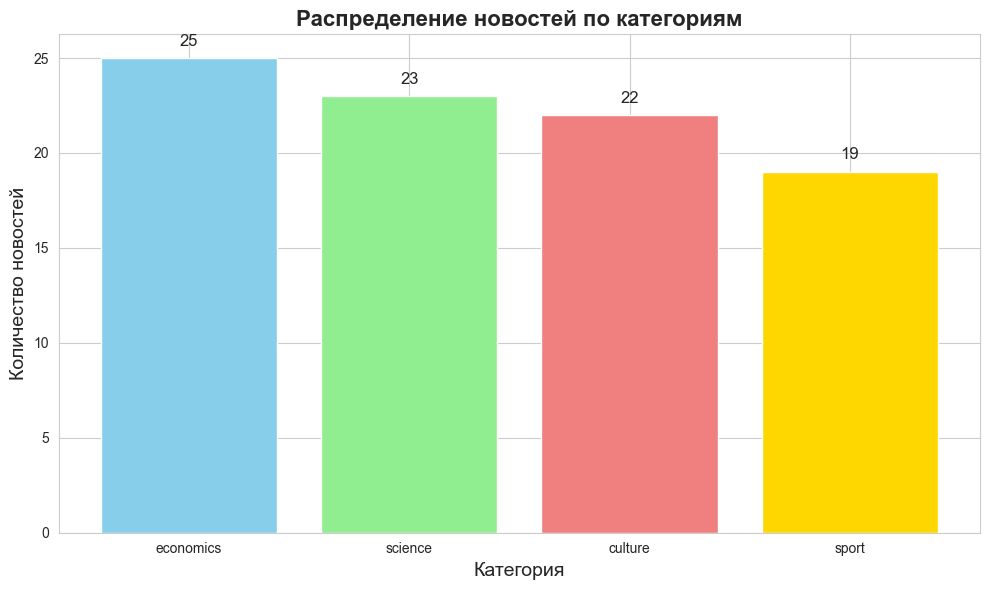

Пропущенные значения:
title       0
text        0
category    0
url         0
dtype: int64

Было строк: 89
Стало строк после очистки: 89
Обучающая выборка: 71 новостей
Тестовая выборка: 18 новостей

Распределение категорий в обучающей выборке:
category
economics    20
science      18
culture      18
sport        15
Name: count, dtype: int64

Распределение категорий в тестовой выборке:
category
economics    5
science      5
sport        4
culture      4
Name: count, dtype: int64
Вариант 1: TfidfVectorizer без стоп-слов
Размерность обучающих данных: (71, 3000)
Размерность тестовых данных: (18, 3000)

Примеры признаков (первые 20): ['10' '100' '100 тысяч' '11' '11 процента' '12' '120' '120 герц' '13'
 '13 процентов' '14' '14 процентов' '14 тысяч' '144' '15' '15 января'
 '150' '16' '16 процентов' '16 тысяч']
Обучение базовой модели k-NN...
Точность базовой модели (k=5): 66.67%

Отчет по классификации:
              precision    recall  f1-score   support

   economics       0.57      1.00 

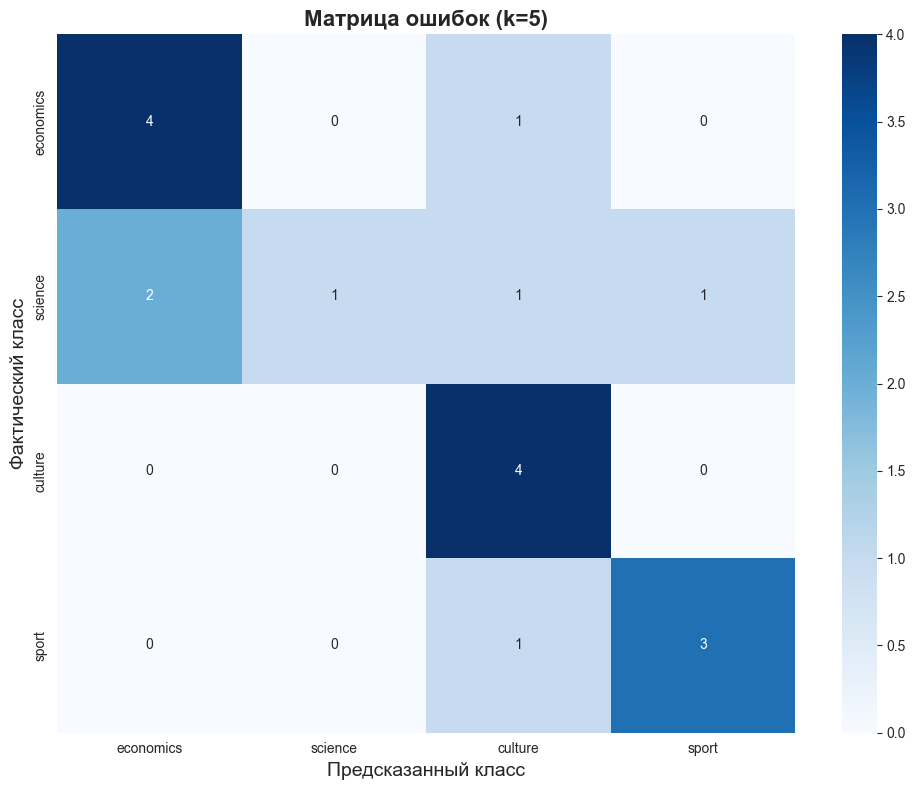

Подбор оптимального количества соседей:
k	Точность на обучении	Точность на тесте
--------------------------------------------------
1	1.0000			0.8333
3	0.9296			0.7778
5	0.8451			0.6667
7	0.8592			0.6667
9	0.8592			0.6667
11	0.8310			0.6111
13	0.8451			0.6667
15	0.8873			0.6667


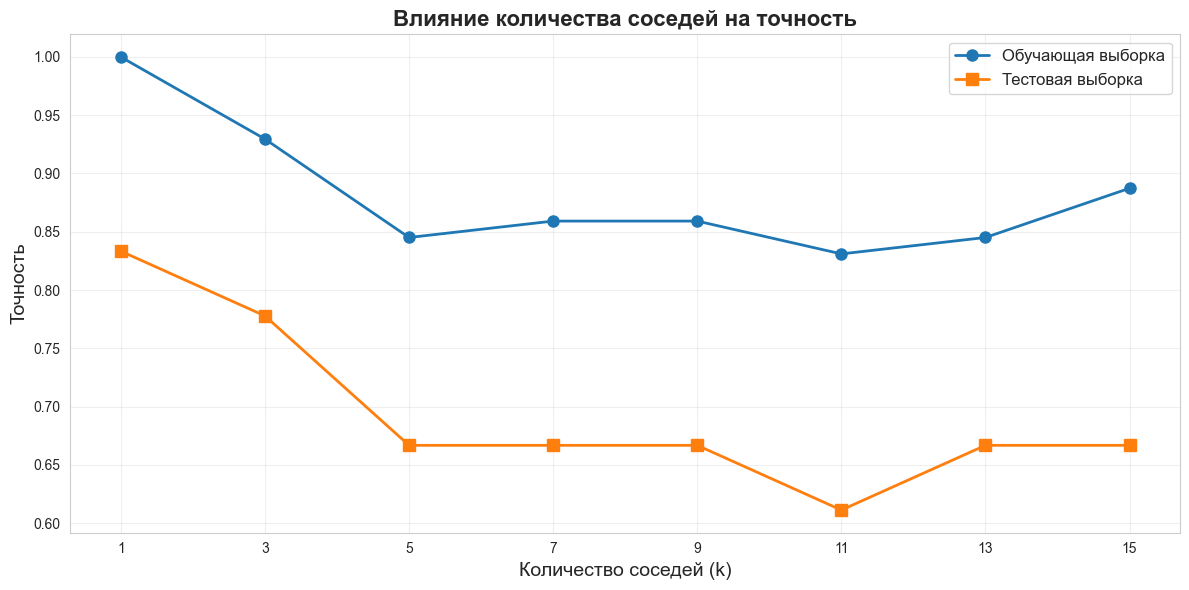


Оптимальное количество соседей: k = 1
Максимальная точность на тесте: 83.33%

Создание финальной модели с k=1...
Точность финальной модели: 83.33%

Детальный отчет:
              precision    recall  f1-score   support

   economics       0.67      1.00      0.80         4
     science       0.80      0.80      0.80         5
     culture       1.00      0.60      0.75         5
       sport       1.00      1.00      1.00         4

    accuracy                           0.83        18
   macro avg       0.87      0.85      0.84        18
weighted avg       0.87      0.83      0.83        18



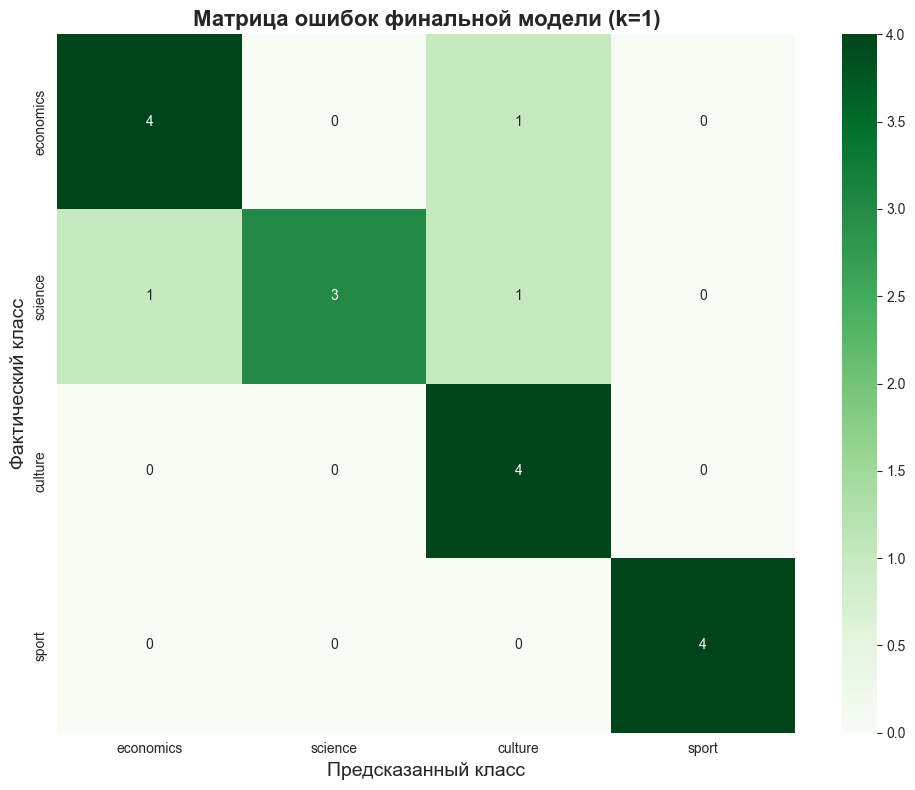

ТЕСТ НА ПРИМЕРЕ ИЗ ЗАДАНИЯ:
Текст: "Назначение министром финансов денежного человека"
Предсказанная категория: economics
Уверенность: 100.00%

Вероятности по всем категориям:
  science: 100.00%
  economics: 0.00%
  culture: 0.00%
  sport: 0.00%

ТЕСТ НА СЛУЧАЙНЫХ НОВОСТЯХ ИЗ ТЕСТОВОЙ ВЫБОРКИ:

Пример 1:
Текст: "первая ракетка россии мирра андреева объяснила нежелание менять спортивное гражданство. ее слова при..."
Истинная категория: sport
Предсказанная категория: sport
Результат: ✓ ВЕРНО

Пример 2:
Текст: "россия является правопреемником ссср, но не российской империи, а потому требования американского ин..."
Истинная категория: economics
Предсказанная категория: economics
Результат: ✓ ВЕРНО

Пример 3:
Текст: "до российского параллельного проката наконец добрался главный блокбастер сезона — уже собравший боль..."
Истинная категория: culture
Предсказанная категория: culture
Результат: ✓ ВЕРНО

Найдено 3 ошибок классификации:

Ошибка 1:
Текст: "китайские миллиардеры стали стремиться к с

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")

df = pd.read_csv('simple_lenta_news.csv')


print("Первые 5 записей в датасете:")
print(df.head())
print("\n" + "="*80 + "\n")

print("Распределение новостей по категориям:")
category_counts = df['category'].value_counts()
print(category_counts)

plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values,
               color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Распределение новостей по категориям', fontsize=16, fontweight='bold')
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Количество новостей', fontsize=14)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

print("Пропущенные значения:")
print(df.isnull().sum())

df_clean = df.dropna(subset=['text', 'category'])

print(f"\nБыло строк: {len(df)}")
print(f"Стало строк после очистки: {len(df_clean)}")

df_clean['text_clean'] = df_clean['text'].str.lower().str.replace(r'\s+', ' ', regex=True)

X = df_clean['text_clean']
y = df_clean['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% для теста
    random_state=42,        # Для воспроизводимости
    stratify=y              # Сохраняем пропорции категорий
)

print(f"Обучающая выборка: {len(X_train)} новостей")
print(f"Тестовая выборка: {len(X_test)} новостей")
print("\nРаспределение категорий в обучающей выборке:")
print(y_train.value_counts())
print("\nРаспределение категорий в тестовой выборке:")
print(y_test.value_counts())

print("Вариант 1: TfidfVectorizer без стоп-слов")

tfidf = TfidfVectorizer(
    max_features=3000,      # Ограничим количество признаков
    min_df=2,               # Слово должно встречаться минимум в 2 документах
    max_df=0.9,             # Исключаем слова, встречающиеся в >90% документов
    ngram_range=(1, 2)      # Учитываем слова и пары слов
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Размерность обучающих данных: {X_train_tfidf.shape}")
print(f"Размерность тестовых данных: {X_test_tfidf.shape}")

feature_names = tfidf.get_feature_names_out()
print(f"\nПримеры признаков (первые 20): {feature_names[:20]}")

print("Обучение базовой модели k-NN...")
knn = KNeighborsClassifier(
    n_neighbors=5,          # Начинаем с 5 соседей
    metric='cosine',        # Косинусное расстояние для текстов
    weights='uniform'       # Все соседи имеют одинаковый вес
)

knn.fit(X_train_tfidf, y_train)

y_pred = knn.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность базовой модели (k=5): {accuracy:.2%}")
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred, target_names=y.unique()))

cm = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Матрица ошибок (k=5)', fontsize=16, fontweight='bold')
plt.ylabel('Фактический класс', fontsize=14)
plt.xlabel('Предсказанный класс', fontsize=14)
plt.tight_layout()
plt.show()

k_values = list(range(1, 16, 2))
train_scores = []
test_scores = []

print("Подбор оптимального количества соседей:")
print("k\tТочность на обучении\tТочность на тесте")
print("-" * 50)

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn_temp.fit(X_train_tfidf, y_train)

    train_score = knn_temp.score(X_train_tfidf, y_train)
    test_score = knn_temp.score(X_test_tfidf, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"{k}\t{train_score:.4f}\t\t\t{test_score:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, 'o-', linewidth=2, markersize=8, label='Обучающая выборка')
plt.plot(k_values, test_scores, 's-', linewidth=2, markersize=8, label='Тестовая выборка')
plt.title('Влияние количества соседей на точность', fontsize=16, fontweight='bold')
plt.xlabel('Количество соседей (k)', fontsize=14)
plt.ylabel('Точность', fontsize=14)
plt.xticks(k_values)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Находим оптимальное k
optimal_k = k_values[test_scores.index(max(test_scores))]
print(f"\nОптимальное количество соседей: k = {optimal_k}")
print(f"Максимальная точность на тесте: {max(test_scores):.2%}")

print(f"\nСоздание финальной модели с k={optimal_k}...")

final_knn = KNeighborsClassifier(
    n_neighbors=optimal_k,
    metric='cosine',
    weights='distance'
)

final_knn.fit(X_train_tfidf, y_train)

y_pred_final = final_knn.predict(X_test_tfidf)
accuracy_final = accuracy_score(y_test, y_pred_final)

print(f"Точность финальной модели: {accuracy_final:.2%}")
print("\nДетальный отчет:")
print(classification_report(y_test, y_pred_final, target_names=y.unique()))

cm_final = confusion_matrix(y_test, y_pred_final, labels=y.unique())
plt.figure(figsize=(10, 8))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens',
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title(f'Матрица ошибок финальной модели (k={optimal_k})', fontsize=16, fontweight='bold')
plt.ylabel('Фактический класс', fontsize=14)
plt.xlabel('Предсказанный класс', fontsize=14)
plt.tight_layout()
plt.show()


def predict_category(text, model, vectorizer, categories):

    text_clean = text.lower().strip()
    text_vectorized = vectorizer.transform([text_clean])

    prediction = model.predict(text_vectorized)[0]
    probabilities = model.predict_proba(text_vectorized)[0]

    result = {
        'text': text[:100] + "..." if len(text) > 100 else text,
        'category': prediction,
        'confidence': max(probabilities),
        'probabilities': {cat: prob for cat, prob in zip(categories, probabilities)}
    }

    return result

# Тест моего собственного примера (ожидается экономика)
test_example = "Назначение министром финансов денежного человека"
result = predict_category(test_example, final_knn, tfidf, y.unique())

print("="*80)
print("ТЕСТ НА ПРИМЕРЕ ИЗ ЗАДАНИЯ:")
print("="*80)
print(f"Текст: \"{result['text']}\"")
print(f"Предсказанная категория: {result['category']}")
print(f"Уверенность: {result['confidence']:.2%}")
print("\nВероятности по всем категориям:")
for cat, prob in sorted(result['probabilities'].items(), key=lambda x: x[1], reverse=True):
    print(f"  {cat}: {prob:.2%}")

# Тестируем на случайных новостях из тестовой выборки
print("\n" + "="*80)
print("ТЕСТ НА СЛУЧАЙНЫХ НОВОСТЯХ ИЗ ТЕСТОВОЙ ВЫБОРКИ:")
print("="*80)

for i in range(min(3, len(X_test))):
    test_text = X_test.iloc[i]
    true_category = y_test.iloc[i]

    result = predict_category(test_text, final_knn, tfidf, y.unique())

    print(f"\nПример {i+1}:")
    print(f"Текст: \"{result['text']}\"")
    print(f"Истинная категория: {true_category}")
    print(f"Предсказанная категория: {result['category']}")
    print(f"Результат: {'✓ ВЕРНО' if true_category == result['category'] else '✗ ОШИБКА'}")


incorrect_indices = np.where(y_test != y_pred_final)[0]

if len(incorrect_indices) > 0:
    print(f"\nНайдено {len(incorrect_indices)} ошибок классификации:")
    print("="*80)

    for i, idx in enumerate(incorrect_indices[:5]):
        actual_text = X_test.iloc[idx]
        actual_category = y_test.iloc[idx]
        predicted_category = y_pred_final[idx]

        print(f"\nОшибка {i+1}:")
        print(f"Текст: \"{actual_text[:150]}...\"")
        print(f"Истинная категория: {actual_category}")
        print(f"Предсказанная категория: {predicted_category}")
        print("-" * 50)
else:
    print("\nВсе новости классифицированы правильно!")


import pickle
import os

# Создаем папку для моделей
model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

# Сохраняем модель и векторизатор
model_path = os.path.join(model_dir, 'knn_lenta_classifier.pkl')
vectorizer_path = os.path.join(model_dir, 'tfidf_vectorizer.pkl')

with open(model_path, 'wb') as f:
    pickle.dump(final_knn, f)

with open(vectorizer_path, 'wb') as f:
    pickle.dump(tfidf, f)

print(f"Модель сохранена: {model_path}")
print(f"Векторизатор сохранен: {vectorizer_path}")

# Функция для загрузки и использования
def load_and_predict(text, model_path=model_path, vectorizer_path=vectorizer_path):
    """Загружает модель и делает предсказание."""
    with open(model_path, 'rb') as f:
        model = pickle.load(f)

    with open(vectorizer_path, 'rb') as f:
        vectorizer = pickle.load(f)

    text_clean = text.lower().strip()
    text_vectorized = vectorizer.transform([text_clean])

    prediction = model.predict(text_vectorized)[0]
    probability = model.predict_proba(text_vectorized)[0].max()

    return prediction, probability

# Тест загрузки
test_text = "Центробанк повысил ключевую ставку на 1%"
pred, conf = load_and_predict(test_text)
print(f"\nТест загрузки модели:")
print(f"Текст: \"{test_text}\"")
print(f"Предсказание: {pred}")
print(f"Уверенность: {conf:.2%}")

# %% [markdown]
# ## 12. Выводы

# %%
print("="*80)
print("ИТОГИ ВЫПОЛНЕНИЯ ЗАДАНИЯ 6")
print("="*80)

print(f"\n1. Данные:")
print(f"   - Всего новостей: {len(df_clean)}")
print(f"   - Категории: {', '.join(df_clean['category'].unique())}")
print(f"   - Обучающая выборка: {len(X_train)} новостей")
print(f"   - Тестовая выборка: {len(X_test)} новостей")

print(f"\n2. Модель:")
print(f"   - Алгоритм: k-Ближайших Соседей (k-NN)")
print(f"   - Оптимальное k: {optimal_k}")
print(f"   - Метрика расстояния: cosine")
print(f"   - Векторизация: TF-IDF ({X_train_tfidf.shape[1]} признаков)")

print(f"\n3. Результаты:")
print(f"   - Точность на тесте: {accuracy_final:.2%}")
print(f"   - Пример из задания: \"{test_example}\"")
print(f"   - Предсказанная категория: {result['category']}")

print(f"\n4. Рекомендации:")
print("   - Увеличить размер датасета")
print("   - Добавить стоп-слова для русского языка")
print("   - Использовать более сложные методы предобработки")
print("   - Протестировать другие алгоритмы")

print("\n" + "="*80)
print("ВЫПОЛНЕНО!")
print("="*80)